# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
os.chdir(r"C:\Users\USER\Desktop\Data Science\Questions")

In [3]:
data=pd.read_csv("bank-loan.csv")

In [4]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


# Converting categorical data as category 

In [7]:
data["ed"]=data.ed.astype("category")

# Checking Null values

In [8]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

Since, missing values are in target variable. I will impute the missing value using the model formation by considering missing values data as my testing data.

# Visualization using plots

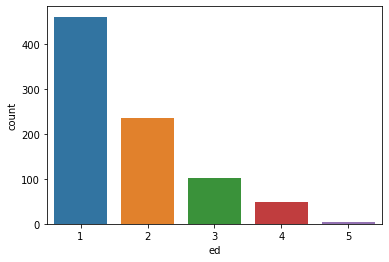

In [9]:
sns.countplot(x="ed",data=data)

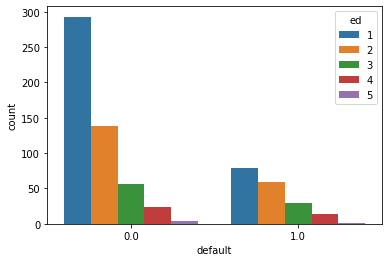

In [10]:
sns.countplot(x="default",hue="ed",data=data)

(array([257., 151., 172.,  86.,  64.,  58.,  30.,  27.,   2.,   3.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

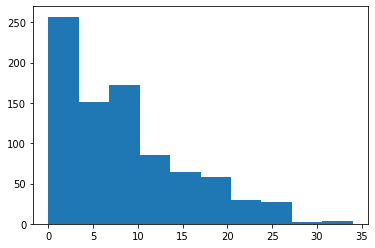

In [11]:
plt.hist(x="address",data=data)

(array([231., 159., 135., 140.,  72.,  53.,  36.,  10.,   6.,   8.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

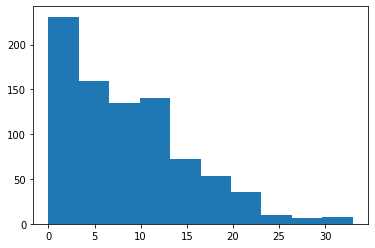

In [12]:
plt.hist(x="employ",data=data)

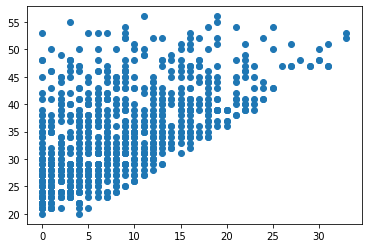

In [13]:
plt.scatter(data["employ"],data["age"])

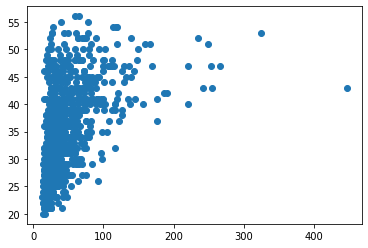

In [14]:
plt.scatter(data["income"],data["age"])

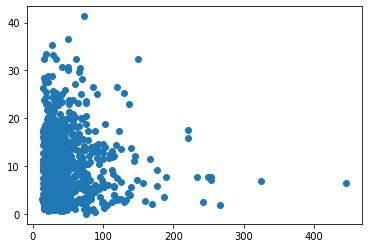

In [15]:
plt.scatter(data["income"],data["debtinc"])
plt.show()

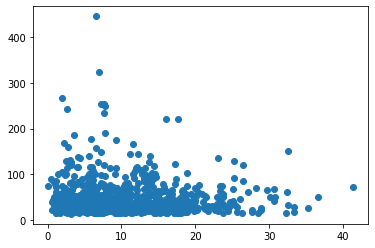

In [16]:
plt.scatter(data["debtinc"],data["income"])

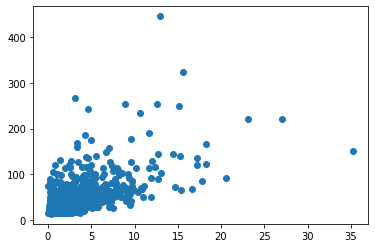

In [17]:
plt.scatter(data["othdebt"],data["income"])

# Boxplot for Outliers

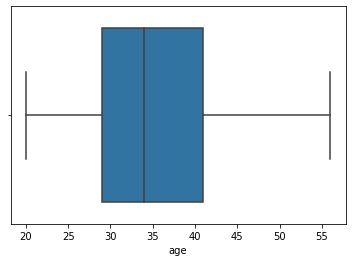

In [18]:
sns.boxplot(data["age"])

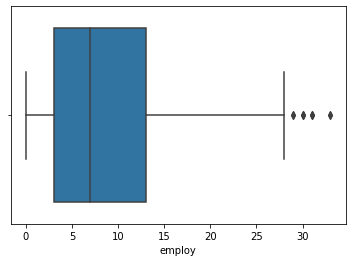

In [19]:
sns.boxplot(data["employ"])

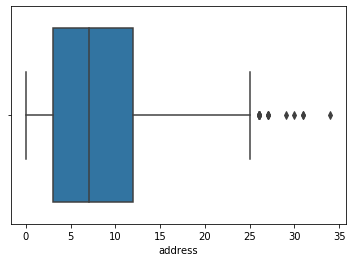

In [20]:
sns.boxplot(data["address"])

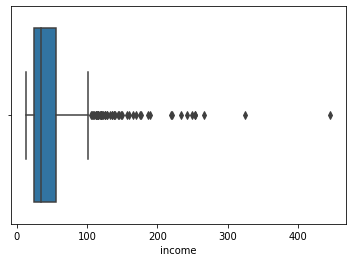

In [21]:
sns.boxplot(data["income"])

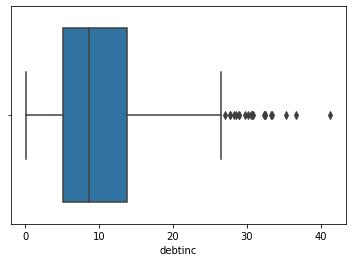

In [22]:
sns.boxplot(data["debtinc"])

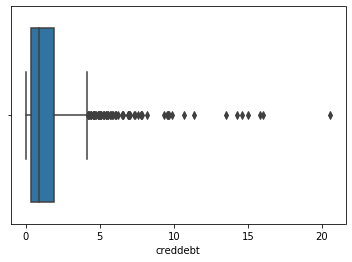

In [23]:
sns.boxplot(data["creddebt"])

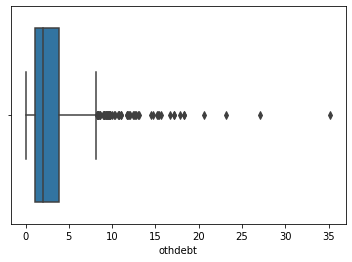

In [24]:
sns.boxplot(data["othdebt"])

# Heatmap

In [25]:
corr=data.corr()
corr

,age,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.137657
employ,0.554241,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.282978
address,0.599949,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.164451
income,0.476218,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.070970
debtinc,0.008240,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.389575
creddebt,0.278907,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.244740
othdebt,0.337841,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.145713
default,-0.137657,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


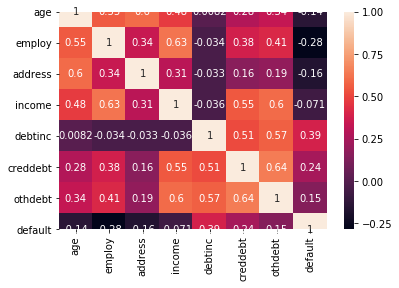

In [26]:
sns.heatmap(corr,annot=True)

# Class distribution

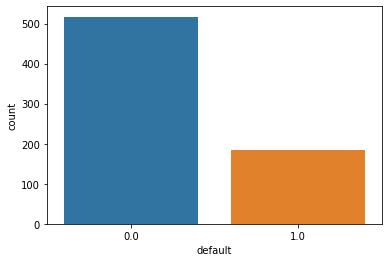

In [27]:
sns.countplot(data["default"])

In [28]:
dist=data["default"].value_counts()
print( "Prob of 0 = ", dist[0]/(dist[0]+dist[1]))
print(" Prob of 1 = " ,dist[1]/(dist[0]+dist[1]))

Prob of 0 =  0.7385714285714285
 Prob of 1 =  0.26142857142857145


# Encoding

In [29]:
ed=pd.get_dummies(data["ed"])
data.drop(["ed"],axis=1,inplace=True)

In [30]:
data=pd.concat([data,ed],axis=1)

In [31]:
data.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default,1,2,3,4,5
0,41,17,12,176,9.3,11.359392,5.008608,1.0,0,0,1,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0.0,1,0,0,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0.0,1,0,0,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0.0,1,0,0,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1.0,0,1,0,0,0


# Training , Testing and Validation data

In [32]:
X_test=data[data['default'].isnull()]
X_test.drop(["default"],axis=1,inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
X_test.shape

(150, 12)

In [34]:
train_data=data[data['default'].notnull()]
Y=train_data.iloc[:,7].values
X=train_data.drop(["default"],axis=1)

In [35]:
Y.shape

(700,)

In [36]:
X.shape

(700, 12)

In [37]:
X=X.values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.20)

# Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test=sc.transform(X_test)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred_val = classifier.predict(X_val)

In [42]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_val,pred_val)
cm

array([[99,  5],
       [22, 14]], dtype=int64)

In [43]:
print(metrics.classification_report(Y_val,pred_val,digits=2))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       104
         1.0       0.74      0.39      0.51        36

    accuracy                           0.81       140
   macro avg       0.78      0.67      0.69       140
weighted avg       0.80      0.81      0.78       140



In [44]:
metrics.accuracy_score(Y_val,pred_val)

0.8071428571428572

In [45]:
y_pred_prob=classifier.predict_proba(X_val)[::,1]
fpr,tpr,thresolds=metrics.roc_curve(Y_val,y_pred_prob)
auc=metrics.roc_auc_score(Y_val,y_pred_prob)

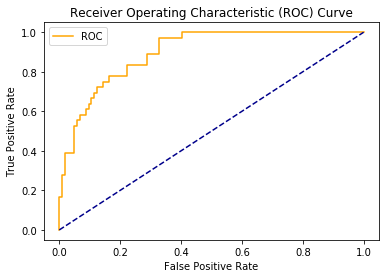

AUC= 0.8966346153846154


In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)
print("AUC=",auc)

# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
pred_val = classifier.predict(X_val)

In [49]:
cm = metrics.confusion_matrix(Y_val, pred_val)
print(cm)
metrics.accuracy_score(Y_val,pred_val)

[[93 11]
 [23 13]]


0.7571428571428571

In [50]:
print(metrics.classification_report(Y_val,pred_val,digits=2))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.85       104
         1.0       0.54      0.36      0.43        36

    accuracy                           0.76       140
   macro avg       0.67      0.63      0.64       140
weighted avg       0.73      0.76      0.74       140



In [51]:
y_pred_prob=classifier.predict_proba(X_val)[::,1]
fpr,tpr,thresolds=metrics.roc_curve(Y_val,y_pred_prob)
auc=metrics.roc_auc_score(Y_val,y_pred_prob)

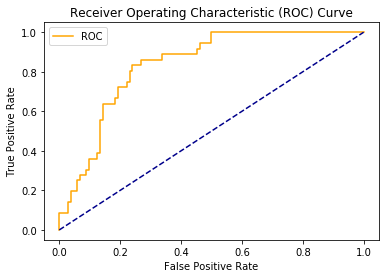

AUC= 0.8341346153846153


In [52]:
plot_roc_curve(fpr,tpr)
print("AUC=",auc)

# KNN

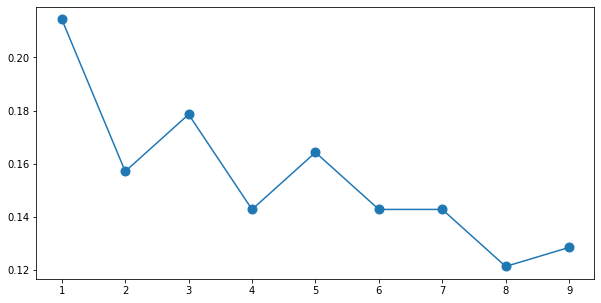

In [53]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_val)
    error_rate.append(np.mean(pred != pred_val))

plt.figure(figsize=(10,5))
plt.plot(range(1,10),error_rate, marker='o', markersize=9)

In [54]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [55]:
pred_val = classifier.predict(X_val)

In [56]:
cm = metrics.confusion_matrix(Y_val, pred_val)
print(cm)
metrics.accuracy_score(Y_val,pred_val)

[[101   3]
 [ 25  11]]


0.8

In [57]:
print(metrics.classification_report(Y_val,pred_val,digits=2))

              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       104
         1.0       0.79      0.31      0.44        36

    accuracy                           0.80       140
   macro avg       0.79      0.64      0.66       140
weighted avg       0.80      0.80      0.77       140



In [58]:
y_pred_prob=classifier.predict_proba(X_val)[::,1]
fpr,tpr,thresolds=metrics.roc_curve(Y_val,y_pred_prob)
auc=metrics.roc_auc_score(Y_val,y_pred_prob)

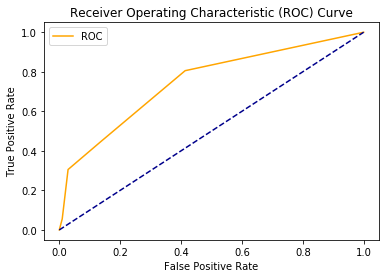

AUC= 0.7471955128205129


In [59]:
plot_roc_curve(fpr,tpr)
print("AUC=",auc)

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [61]:
pred_val = classifier.predict(X_val)

In [62]:
cm = metrics.confusion_matrix(Y_val, pred_val)
print(cm)
metrics.accuracy_score(Y_val,pred_val)

[[83 21]
 [18 18]]


0.7214285714285714

In [63]:
print(metrics.classification_report(Y_val,pred_val,digits=2))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       104
         1.0       0.46      0.50      0.48        36

    accuracy                           0.72       140
   macro avg       0.64      0.65      0.64       140
weighted avg       0.73      0.72      0.72       140



In [64]:
y_pred_prob=classifier.predict_proba(X_val)[::,1]
fpr,tpr,thresolds=metrics.roc_curve(Y_val,y_pred_prob)
auc=metrics.roc_auc_score(Y_val,y_pred_prob)

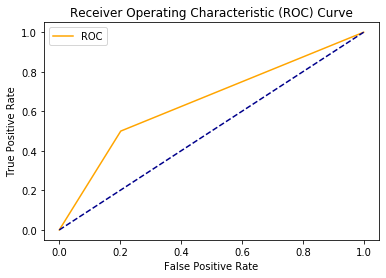

AUC= 0.6490384615384616


In [65]:
plot_roc_curve(fpr,tpr)
print("AUC=",auc)

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
pred_val = classifier.predict(X_val)

In [68]:
cm = metrics.confusion_matrix(Y_val, pred_val)
print(cm)
metrics.accuracy_score(Y_val,pred_val)

[[98  6]
 [22 14]]


0.8

In [69]:
print(metrics.classification_report(Y_val,pred_val,digits=2))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87       104
         1.0       0.70      0.39      0.50        36

    accuracy                           0.80       140
   macro avg       0.76      0.67      0.69       140
weighted avg       0.79      0.80      0.78       140



In [70]:
y_pred_prob=classifier.predict_proba(X_val)[::,1]
fpr,tpr,thresolds=metrics.roc_curve(Y_val,y_pred_prob)
auc=metrics.roc_auc_score(Y_val,y_pred_prob)

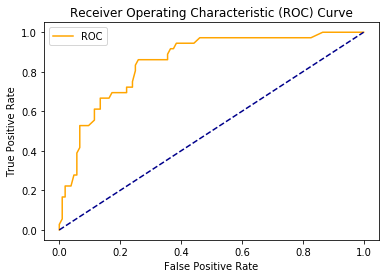

AUC= 0.8512286324786323


In [71]:
plot_roc_curve(fpr,tpr)
print("AUC=",auc)

# Best fit model and the result

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
pred=classifier.predict(X_test)

In [74]:
df=pd.read_csv("bank-loan.csv")

In [75]:
df.fillna(-1,inplace=True)

In [76]:
j=0
for i in range(850):
    if df["default"][i]==-1:
        df["default"][i]=pred[j]
        j+=1

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     850 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


# Final model

In [78]:
df["ed"]=df.ed.astype("category")

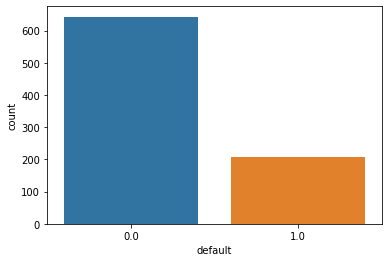

In [79]:
sns.countplot(x="default",data=df)

In [80]:
ed=pd.get_dummies(df["ed"])
df.drop(["ed"],axis=1,inplace=True)
df=pd.concat([df,ed],axis=1)

In [81]:
df.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default,1,2,3,4,5
0,41,17,12,176,9.3,11.359392,5.008608,1.0,0,0,1,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0.0,1,0,0,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0.0,1,0,0,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0.0,1,0,0,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1.0,0,1,0,0,0


In [82]:
Y=df.iloc[:,7].values
X=df.drop(["default"],axis=1)

In [83]:
X.shape

(850, 12)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
pred = classifier.predict(X_test)

In [87]:
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)
metrics.accuracy_score(Y_test,pred)

[[124   5]
 [ 21  20]]


0.8470588235294118

In [88]:
print(metrics.classification_report(Y_test,pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       129
         1.0       0.80      0.49      0.61        41

    accuracy                           0.85       170
   macro avg       0.83      0.72      0.76       170
weighted avg       0.84      0.85      0.83       170



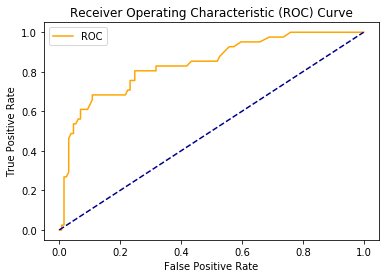

AUC= 0.8393836263944036


In [89]:
y_pred_prob=classifier.predict_proba(X_test)[::,1]
fpr,tpr,thresolds=metrics.roc_curve(Y_test,y_pred_prob)
auc=metrics.roc_auc_score(Y_test,y_pred_prob)
plot_roc_curve(fpr,tpr)
print("AUC=",auc)